# Dynamic heuristic analysis

This notebook is used to analyze logs produced with `experimental` flag by dynamic heuristic.

Expected format is comma-separated list of:
- metaheuristic name
- generation
- duration (ms)
- metaheuristic estimation (MDP weight)
- search state. Possible values are in `[best_major, best_minor, diverse, stagnated]`


In [117]:
import pandas as pd
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt

#%matplotlib inline
#plt.rcParams["figure.figsize"] = (28, 14)

pd.set_option("display.max.columns", None)

log_file_path = '/home/builuk/playground/vrp-rst/1.log'

# extract csv content from raw solver log file
csv_file_path = "{}.csv".format(log_file_path)
should_add = False
with open(log_file_path, mode='r') as log_file, open(csv_file_path, 'w') as csv_file:
    for line in log_file:
        if line.startswith('name,'):
            should_add = True
        if should_add and line == '\n':
            should_add = False
        if should_add:
            csv_file.write(line)


data = pd.read_csv(csv_file_path)


# All by search state

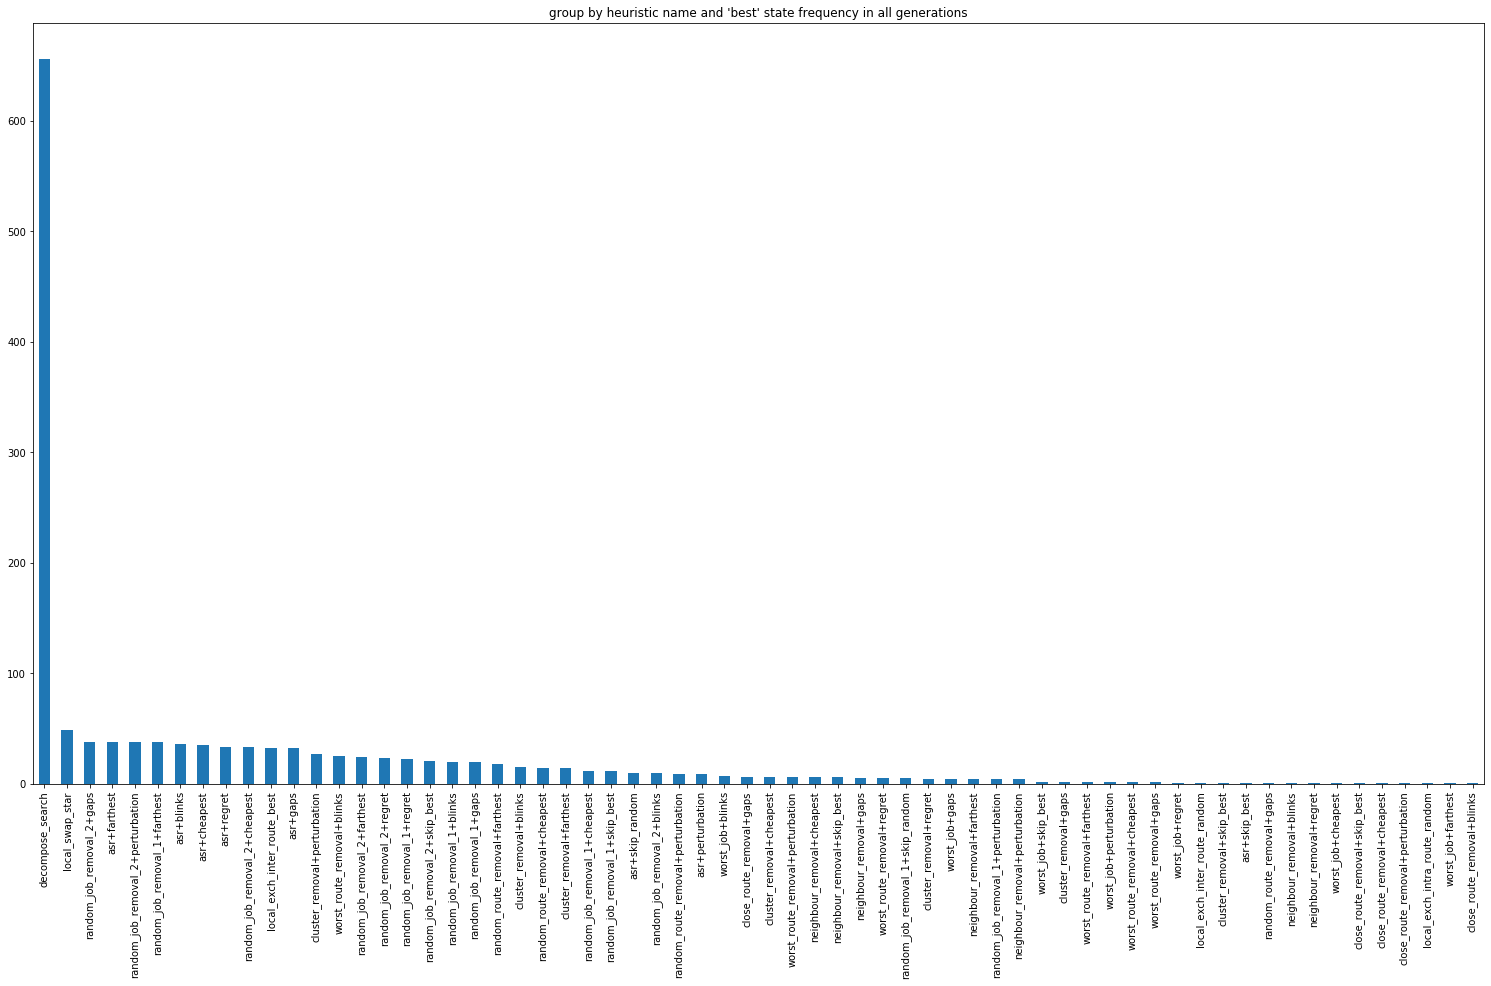

In [118]:
# NOTE: change filter to analyize other states
state_filter = (data.state == 'best_minor') | (data.state == 'best_major')
state_label = 'best'

def create_bins(column, steps):
    max = column.max()
    divider = round(max / steps)
    return [x for x in range (max) if x % divider == 0]


df = data[state_filter]
df['name'].value_counts().plot.bar(
    figsize = (26, 14), 
    log=False,
    title = "group by heuristic name and '{}' state frequency in all generations".format(state_label)
)

# By specific heuristic name

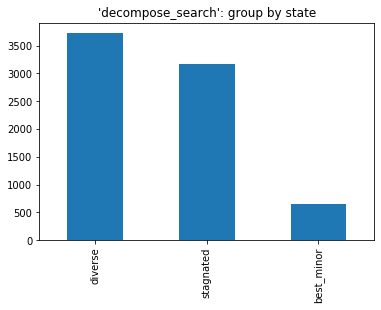

In [119]:
heuristic_name = 'decompose_search'

df = data[data.name == heuristic_name]
df['state'].value_counts().plot.bar(log=False, title="'{}': group by state".format(heuristic_name))

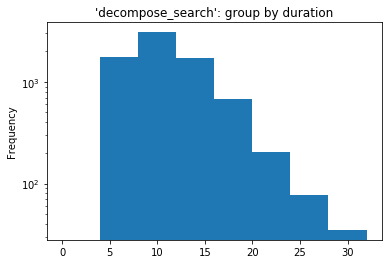

In [120]:
bins = create_bins(df['duration'], 10)
df['duration'].plot.hist(bins=bins, log=True, title = "'{}': group by duration".format(heuristic_name))

/home/builuk/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


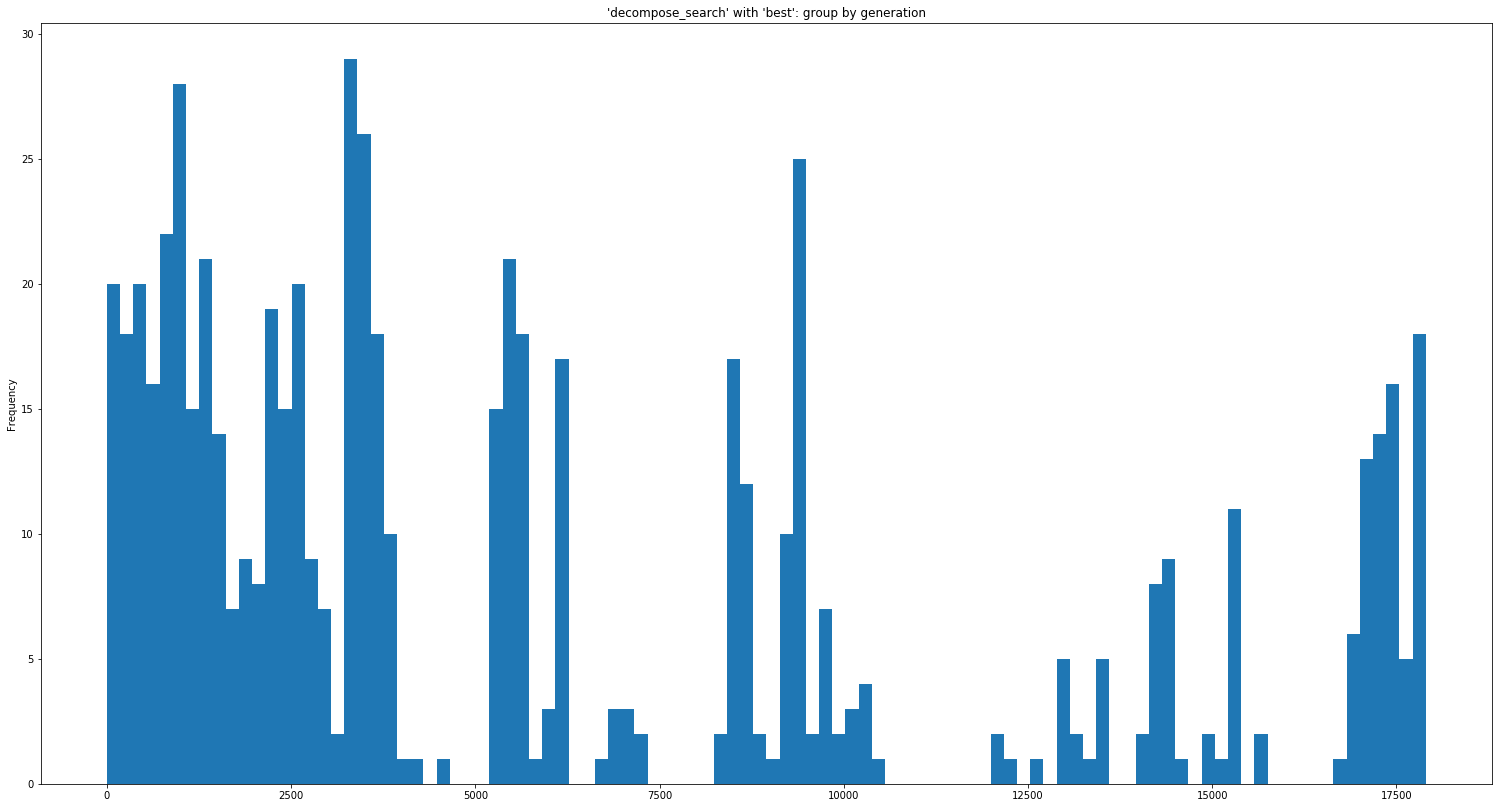

In [121]:
df = data[data.name == heuristic_name]
df = df[state_filter]

bins = create_bins(df['generation'], 100)
df['generation'].plot.hist(bins=bins, figsize = (26, 14),
 title = "'{}' with '{}': group by generation".format(heuristic_name, state_label)
)

## Multiple heuristics analysis

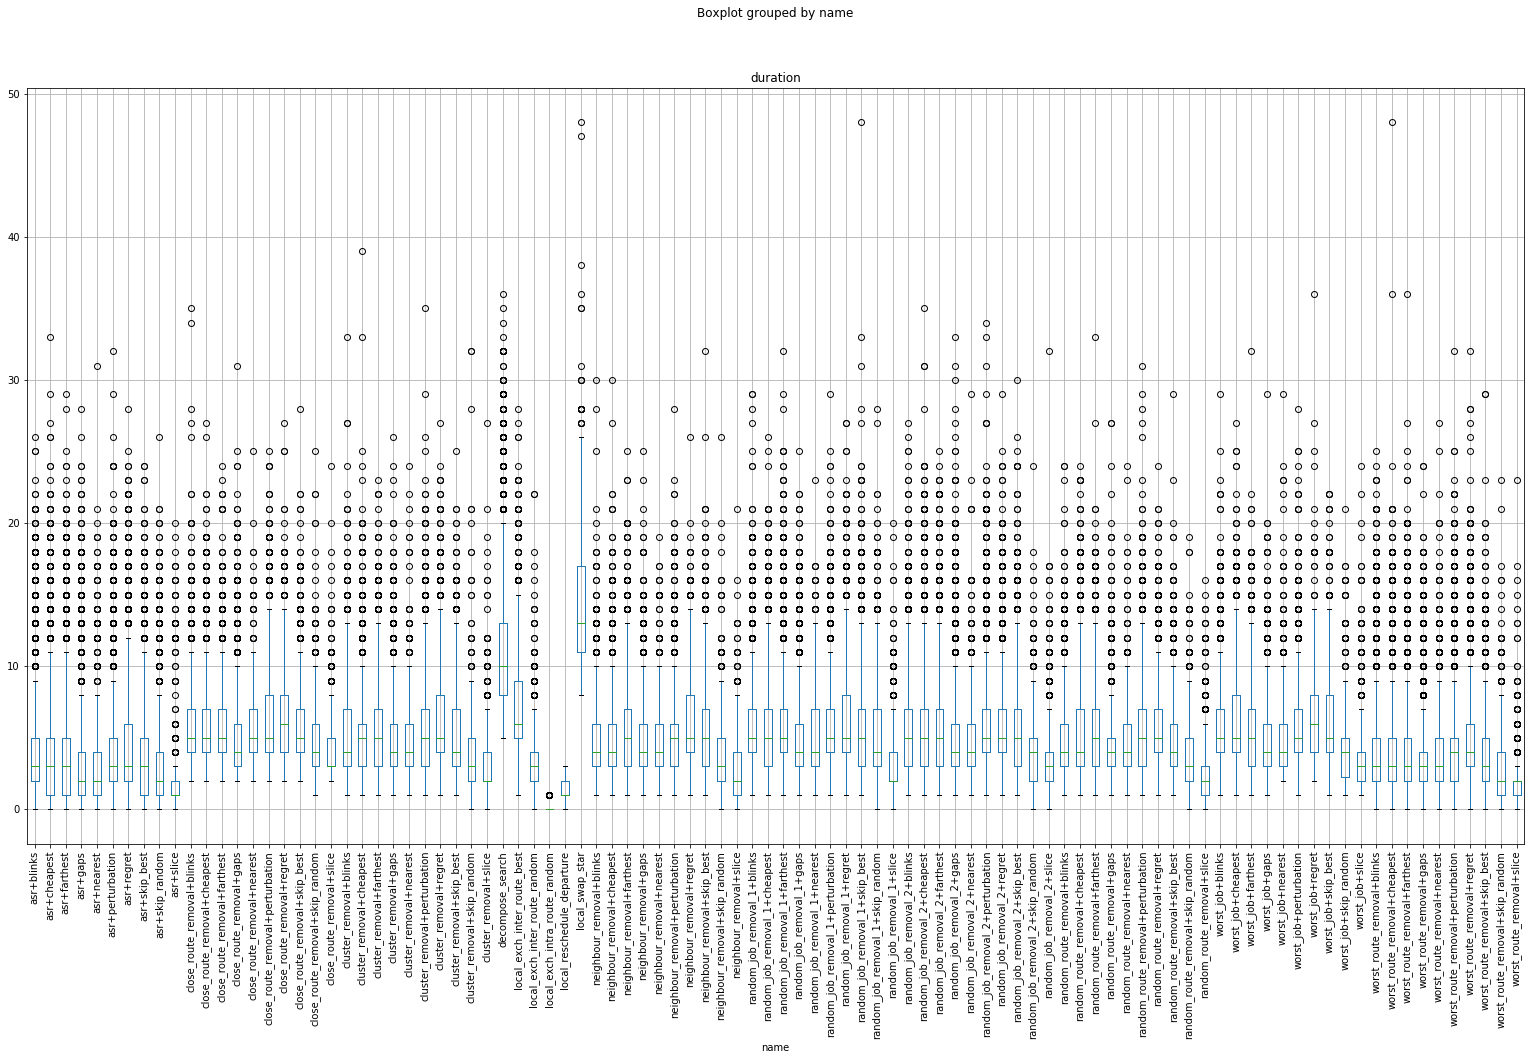

In [122]:
df = data
df.boxplot(
    column=['duration'], by='name', figsize = (26, 14), rot=90
)

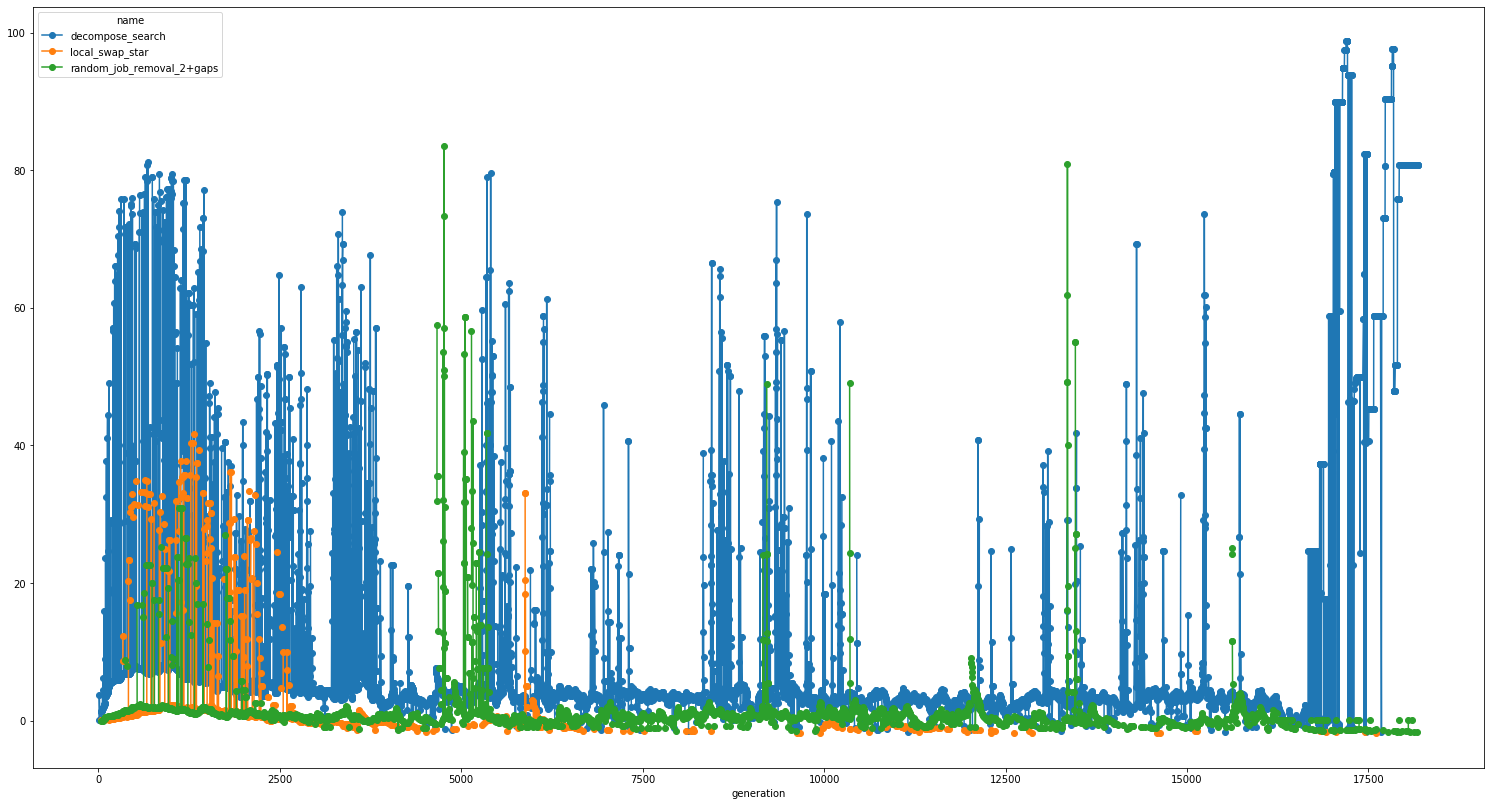

In [123]:

names = list(data[state_filter]['name'].value_counts().head(3).keys())
df = data[data['name'].isin(names)]
#df = df[df['generation'] < 1000]

estimations = df.pivot_table(index = 'generation', columns='name', values='estimation', aggfunc='mean')
estimations.plot.line(figsize = (26, 14), style='-o')
